In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing

from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout , LSTM # importing dense layer
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras import layers
# representation of model layers

import itertools
from itertools import cycle

2024-06-24 18:20:12.768514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 18:20:12.768620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 18:20:12.902352: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv("/kaggle/input/wsnds/WSN-DS.csv")

In [3]:
data.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [4]:
data.shape

(374661, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [6]:
data['Attack type'].value_counts()

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,374661.0,274969.325879,389898.554898,101000.0,107093.00000,116071.00000,215072.00000,3.402096e+06
Time,374661.0,1064.748712,899.646164,50.0,353.00000,803.00000,1503.00000,3.600000e+03
Is_CH,374661.0,0.115766,0.319945,0.0,0.00000,0.00000,0.00000,1.000000e+00
who CH,374661.0,274980.411108,389911.221735,101000.0,107096.00000,116072.00000,215073.00000,3.402100e+06
Dist_To_CH,374661.0,22.599380,21.955794,0.0,4.73544,18.37261,33.77600,2.142746e+02
ADV_S,374661.0,0.267698,2.061148,0.0,0.00000,0.00000,0.00000,9.700000e+01
ADV_R,374661.0,6.940562,7.044319,0.0,3.00000,5.00000,7.00000,1.170000e+02
JOIN_S,374661.0,0.779905,0.414311,0.0,1.00000,1.00000,1.00000,1.000000e+00
JOIN_R,374661.0,0.737493,4.691498,0.0,0.00000,0.00000,0.00000,1.240000e+02
SCH_S,374661.0,0.288984,2.754746,0.0,0.00000,0.00000,0.00000,9.900000e+01


In [8]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

In [9]:
# label encoding (0,1,2,3,4) m.applylti-class labels (Normal,Grayhole,Blackhole,TDMA,Flooding)
    
classes = {'Normal':0 ,'Grayhole':1,'Blackhole':2,'TDMA':3,'Flooding':4}

data['Attack type'] = data['Attack type'].map( classes ).astype(int)


In [10]:
X = data.drop(['Attack type'] , axis=1)
y = data['Attack type']

In [11]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(y)

In [12]:
X=np.array(X)
y=np.array(y)

In [13]:
# splitting the dataset 67% for training and 33% testing and evaluating
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.33, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [15]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))


In [16]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(.4))
model.add(Dense(5,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 18, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       461,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,141 (1.92 MB)

 Trainable params: 503,141 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [19]:
history=model.fit(X_train, y_train, epochs=30,verbose=1,batch_size=500,validation_data=(X_val, y_val))

Epoch 1/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9493 - loss: 0.2094 - val_accuracy: 0.9791 - val_loss: 0.0481
Epoch 2/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9777 - loss: 0.0498 - val_accuracy: 0.9814 - val_loss: 0.0396
Epoch 3/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9803 - loss: 0.0437 - val_accuracy: 0.9810 - val_loss: 0.0395
Epoch 4/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9808 - loss: 0.0406 - val_accuracy: 0.9813 - val_loss: 0.0376
Epoch 5/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9817 - loss: 0.0395 - val_accuracy: 0.9821 - val_loss: 0.0368
Epoch 6/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0389 - val_accuracy: 0.9830 - val_loss: 0.0361
Epoch 7/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0386 - val_accuracy: 0.9835 - val_loss: 0.0357
Epoch 8/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9826 - loss: 0.0375 - val_accuracy: 0.

In [20]:
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Extract features for the training data
X_train_features = feature_extractor.predict(X_train)

# Get the output from the Flatten layer of the CNN-LSTM model
# try not flatten test

#Import Libraries
from sklearn.ensemble import RandomForestClassifier

#Applying KNeighborsRegressor Model 


7845/7845 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train_features, y_train, test_size=0.33, random_state=42)


In [22]:
proposed =  RandomForestClassifier(n_estimators=100, random_state=0)
    
proposed.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
y_pred_test = proposed.predict(X_test)

# For Plot curve
y_pred_evaluation_test = to_categorical(np.argmax(y_pred_test, axis=1), 5)

# For evaluation
y_pred_argmax_test=(np.argmax(y_pred_test, axis=1))

y_test_argmax=(np.argmax(y_test, axis=1))

In [24]:
# Calculating Area under the curve
def AUC(actual_class, pred_class, average = "micro"):
    
    #Making a set of all the unique classes 
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #Making a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [25]:
def plot_roc_curve(y_test,y_pred):
    n_classes=5
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("LSTM RF AUC")
    plt.legend(loc="lower right")
    plt.show()

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
print('AUC Score is on Test : ' , AUC(y_test_argmax, y_pred_argmax_test))

AUC Score is on Test :  {0: 0.9911444186372639, 1: 0.9914550567882167, 2: 0.9952538279558558, 3: 0.9671853856562923, 4: 0.9919086416432378}


In [28]:
from sklearn.metrics import classification_report

target = ['Normal','Grayhole','Blackhole','TDMA','Flooding']

print("Classification Report on Data Test \n" , classification_report(y_test_argmax, y_pred_argmax_test, target_names=target))

Classification Report on Data Test 
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     75233
    Grayhole       0.99      0.98      0.99      3200
   Blackhole       0.98      0.99      0.99      2214
        TDMA       1.00      0.93      0.97      1478
    Flooding       0.92      0.98      0.95       713

    accuracy                           1.00     82838
   macro avg       0.98      0.98      0.98     82838
weighted avg       1.00      1.00      1.00     82838



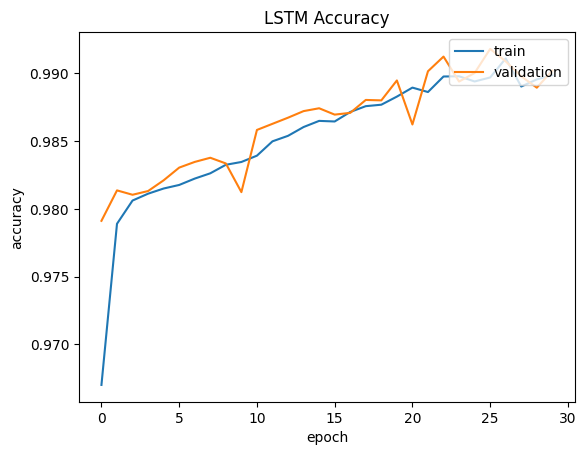

In [29]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("LSTM Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

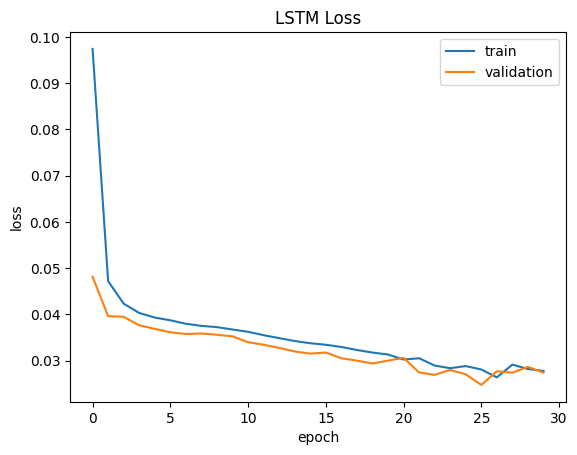

In [30]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("LSTM Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Confusion matrix, without normalization


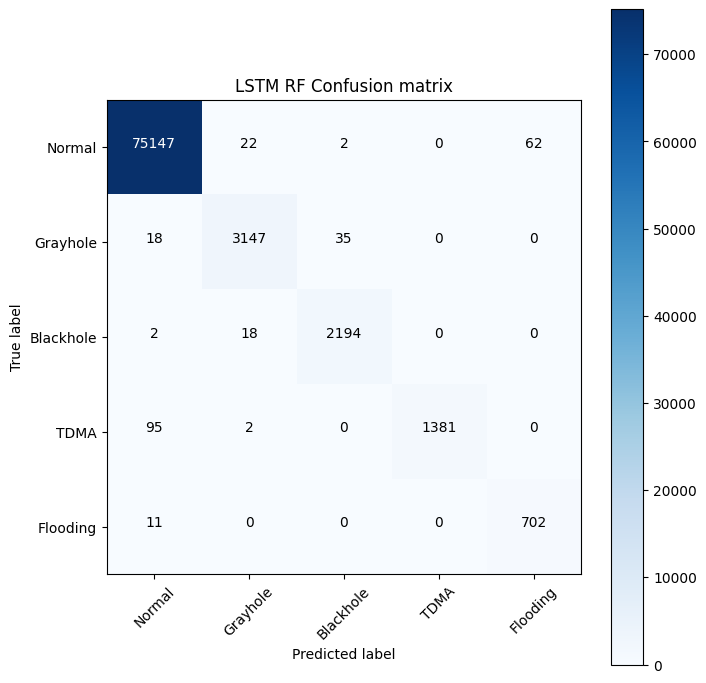

In [31]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_argmax, y_pred_argmax_test)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=target,
                      title='LSTM RF Confusion matrix')
plt.show()

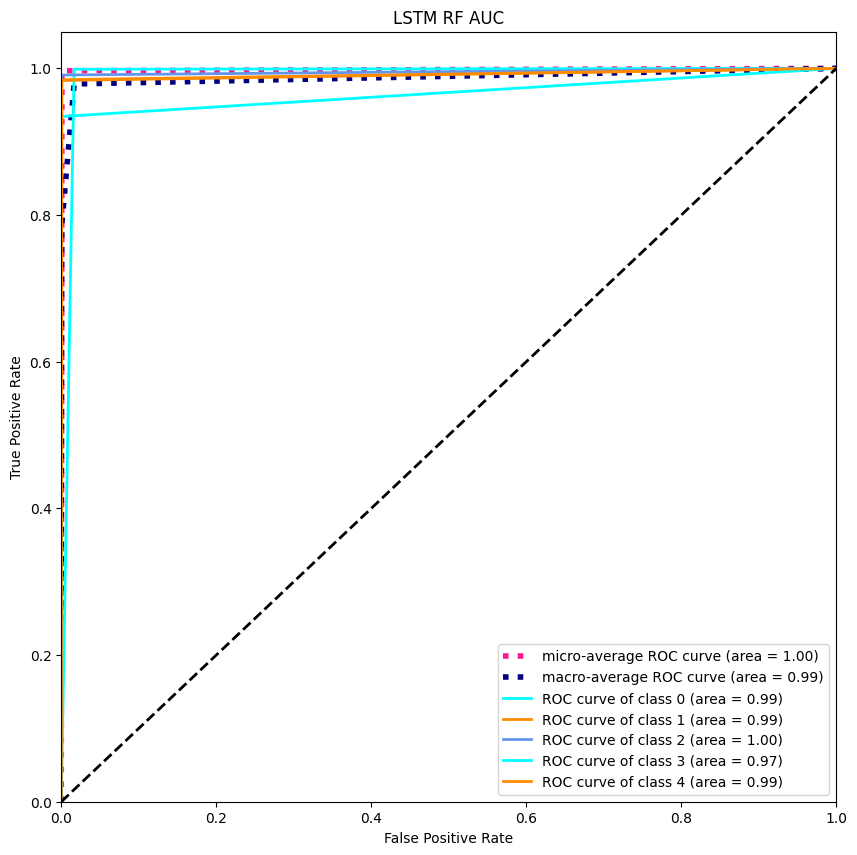

In [32]:
plot_roc_curve(y_test,y_pred_evaluation_test)

In [33]:
model.save("lstm.h5")

In [34]:
print("Accuracy:", accuracy_score(y_test,y_pred_evaluation_test)) 

Accuracy: 0.9967768415461503
